# How To Setup and Configure a Proxy Server – Squid Proxy

A proxy server has many use cases. it could range from personal internet access to restrict organization systems/servers to access the external world or to limit external internet access for a set of servers on the cloud.

The best way to configure a proxy server is by using the Squid proxy. It is a widely used proxy server.

In this article, we have covered the following.

*Install proxy server*

*Configure the proxy server*

*Configure basic proxy authentication.*

## Install Proxy Server: Squid Proxy
### Step1: Update the server

>sudo yum update -y

### Step 2: Configure EPEL repo.

>sudo yum -y install epel-release

>sudo yum -y update

>sudo yum clean all

### Step 3: Install squid

>sudo yum -y install squid

### Step 4: Start and enable squid server.

>sudo systemctl start squid

>sudo systemctl enable squid

# Step 5: Check the status of squid server.

>sudo systemctl status squid

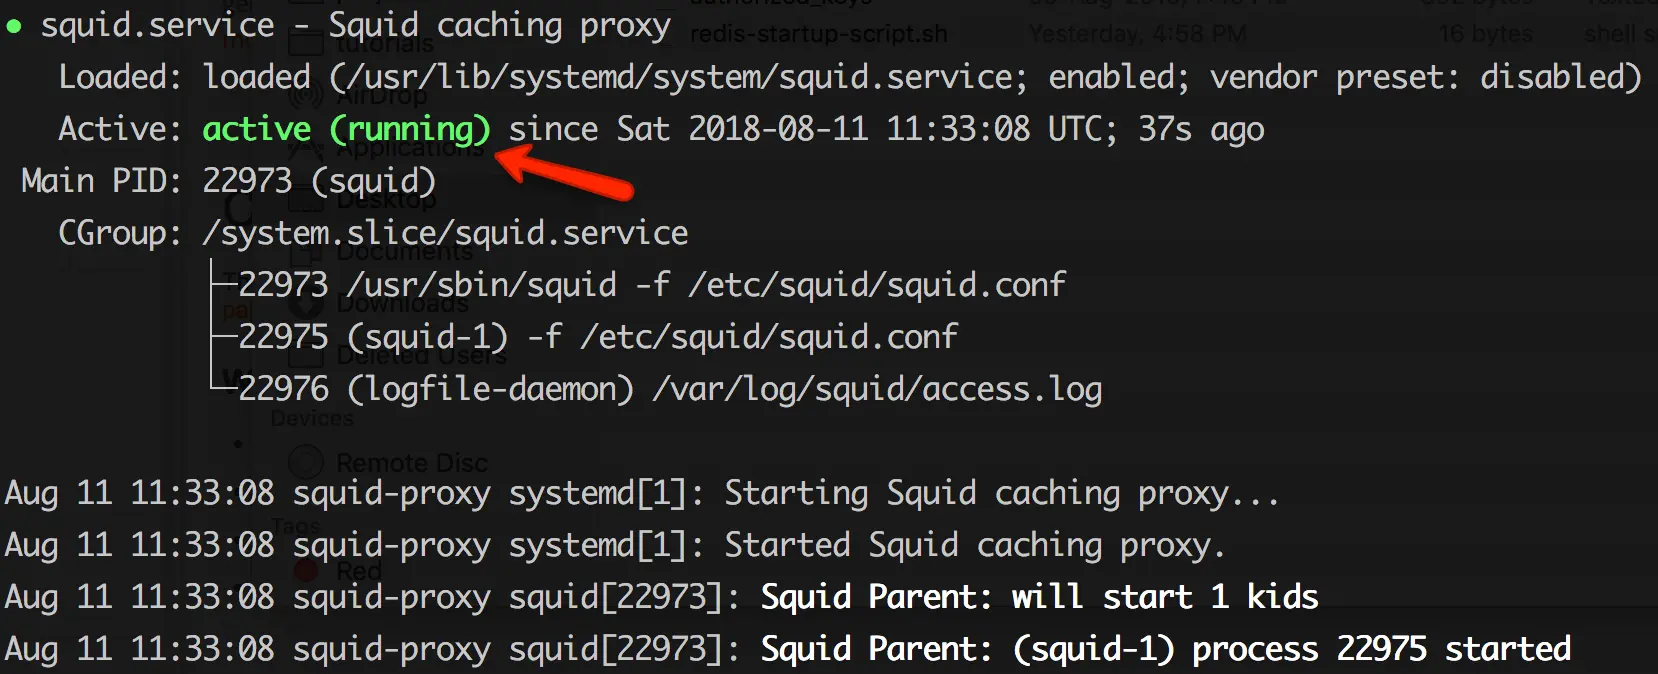

## Configure Proxy Server: Squid Proxy
All the configurations for the squid server are present in **/etc/squid/squid.conf file.**

### Configure proxy Sources To Access Internet
First, you need to configure the sources from which squid proxy should accept connections. For example, you might need to access this proxy server only from your home network or from specific CIDR ranges.

You can add a source IP range with an ACL using the following format.

>acl localnet src 110.220.330.0/24

Open **/etc/squid/squid.conffile** and add the source add as shown below. Change the IP to the desired network/IP source based on your needs. In the following example, we have added a single source IP.

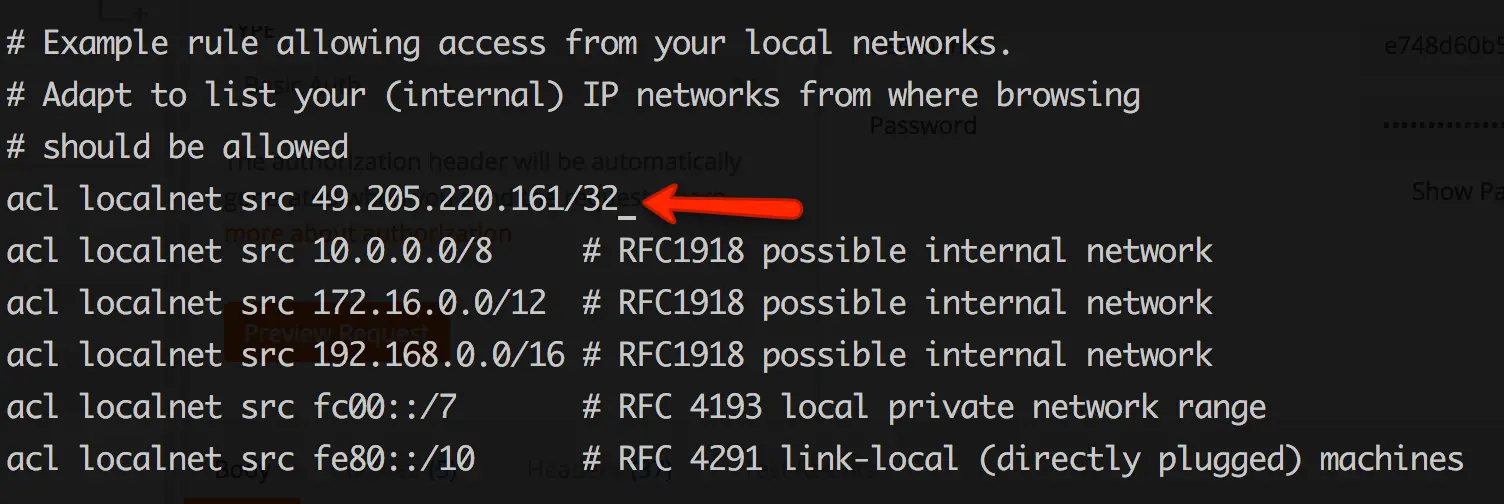

Restart the proxy server after making the ACL changes.

>sudo systemctl restart squid

### Test proxy Server Connectivity
Test if the proxy server is working using a simple curl request. Use the following curl format. By default squid proxy runs on 3128 port.

>curl -x http://<squid-proxy-server-IP>:3128  -L http://google.com

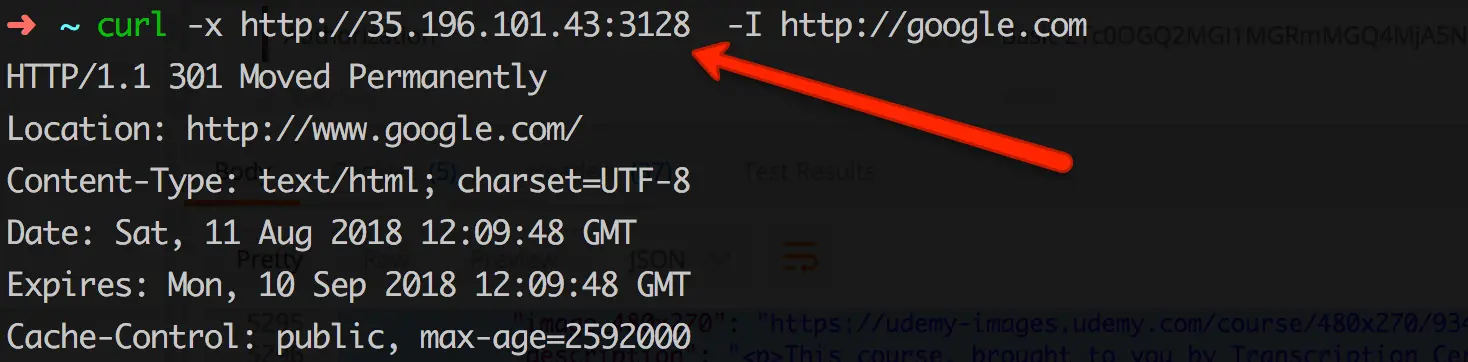

## Configure Proxy Authentication
Along with access ACL’s, you can add basic authentication to your proxy server for extra security. Follow the steps given below for setting up a basic auth for the squid proxy server.

Step 1: Install httpd-tools

>sudo yum -y install httpd-tools

Step 2: Create a passwd file and make squid as the file owner.

>sudo touch /etc/squid/passwd && sudo chown squid /etc/squid/passwd

Step 3: Add pxuser  to the password file using htpasswd utility. It will prompt for a custom password. Enter a strong password you need. This username and password will be used for all connections through this proxy.

>sudo htpasswd /etc/squid/passwd pxuser

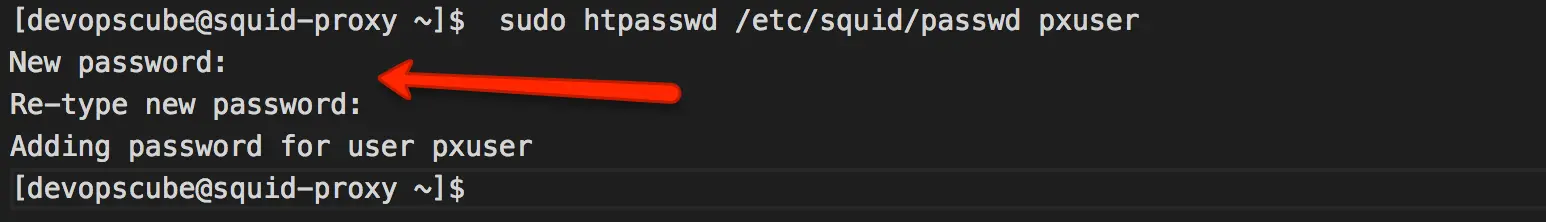

Step 4: Open squid config file.

>sudo vi /etc/squid/squid.conf

Add the following to the config file and save it.

>auth_param basic program /usr/lib64/squid/basic_ncsa_auth /etc/squid/passwd
>auth_param basic children 5
>auth_param basic realm Squid Basic Authentication
>auth_param basic credentialsttl 2 hours
>acl auth_users proxy_auth REQUIRED
>http_access allow auth_users

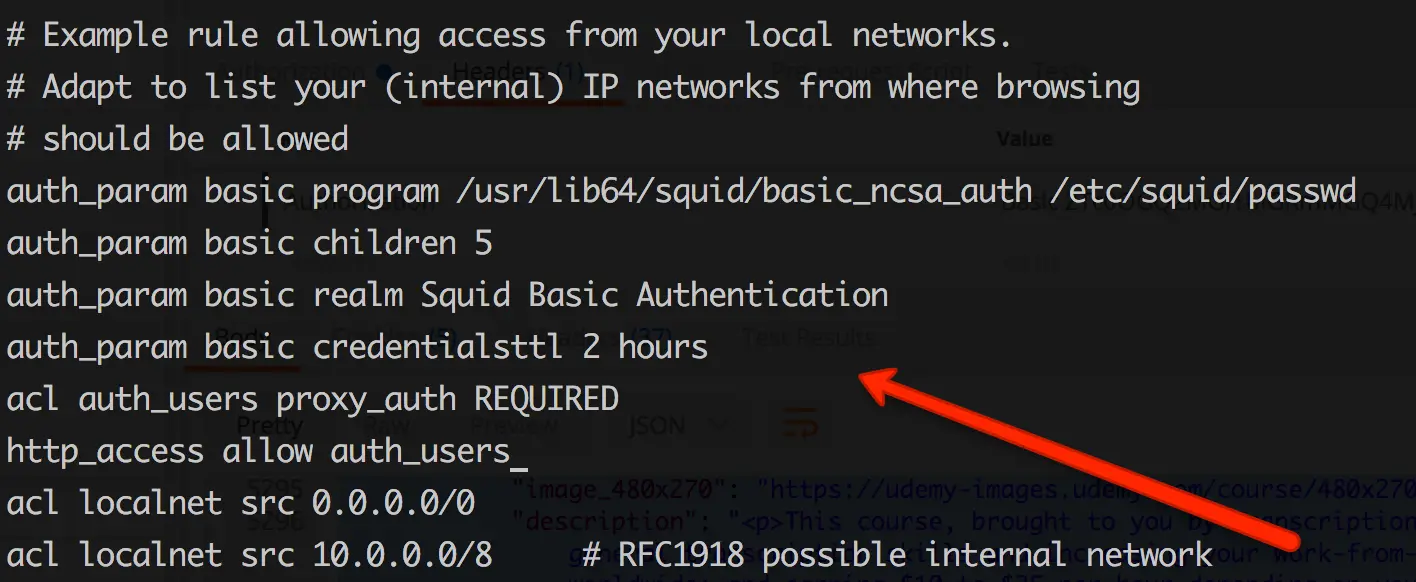

Step 5: Now, restart squid server for the configuration changes to take place.

>sudo systemctl restart squid

Step 6: Now if you test the proxy connection using curl, you will get the “authentication required message” as shown below.

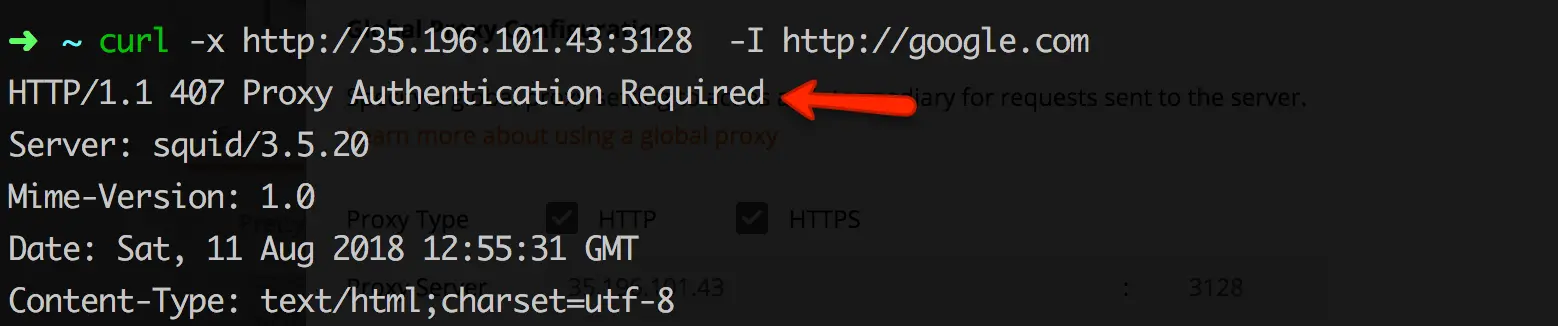

Now, test the connectivity with proxy user and password we configured in step 3. An example syntax is shown below.

>curl -x http://35.196.101.43:3128  --proxy-user pxuser:12345  -I http://google.com

With username and password, your proxy request should go through.

## Blocking Websites
Another great use of the proxy server is restricting the website access. Follow the steps below for creating a block list.

Step 1: Open a blocked list file.

>sudo vi /etc/squid/blocked_sites

Add the websites to be blocked in the file. For example,

>facebook.com
>twitter.com
>instagram.com

Step 2: Open the squid config file.

>sudo vi /etc/squid/squid.conf

Add the following to the ACL list.

>acl blocked_sites dstdomain "/etc/squid/blocked_sites"
>http_access deny blocked_sites

Step 3: Restart the squid server.

>sudo systemctl restart squid

Now if you try to access the blocked site through the proxy, you will get a forbidden message as shown below.

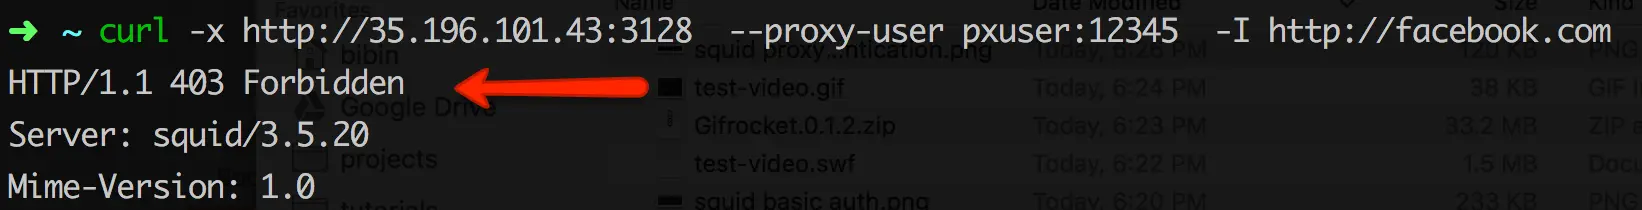